Imports

In [19]:
import requests
from json import dumps
import pandas as pd
import matplotlib.pyplot as plt

Activity 1

1.1 Sub-activity: Open Data Covid-19 API

Task 1

In [16]:
# Solution for Task 1


def get_api_data(filters, structure):
    endpoint = "https://api.coronavirus.data.gov.uk/v1/data" #[1]
    page = 1
    data_list = []

    while True:            # API parameters such as filters, structure and pages   
        api_params = {
            "filters": filters,
            "structure": dumps(structure, separators=(",", ":")),
            "page": page}
        
        
    # Send HTTP GET request to the endpoint as mentioned above with parameters and timeout session of 10

        response = requests.get(endpoint, params=api_params, timeout=10)

    # Check for errors in the response
    
        if response.status_code >= 400:
            raise RuntimeError(f'Request failed: {response.text}')

    # Parse JSON response and append data to the list
        data = response.json()["data"]
        data_list.extend(data)

    # Check if there are more pages
        next_page = response.json()["pagination"]["next"]
        if next_page is not None:
            page += 1
        else:
            break

    return data_list

if __name__ == '__main__':
    # Filters for nation have been created as per [2]
    filters_england = "areaType=nation;areaName=england"
    filters_wales = "areaType=nation;areaName=wales"
    filters_northern_ireland = "areaType=nation;areaName=northern ireland"
    filters_scotland = "areaType=nation;areaName=scotland"
    
    # Filters for region have been created as per [2]
    filters_london = "areaType=region;areaName=london"
    filters_east_midlands="areaType=region;areaName=east midlands"
    filters_north_east="areaType=region;areaName=north east"
    filters_north_west="areaType=region;areaName=north west"
    
    # List of valid metrics for structure is given in [3]
    structure = {
        "date": "date",
        "name": "areaName",
        "dailyCases": "newCasesBySpecimenDate",
        "cumulativeCases": "cumCasesBySpecimenDate",
        "dailyDeaths": "newDeaths28DaysByPublishDate",
        "cumulativeDeaths": "cumDeaths28DaysByPublishDate",
        "cumulativeVaccinated": "cumPeopleVaccinatedCompleteByVaccinationDate",
    }

    # Get data for Nations- England, Wales, Northern Ireland and Scotland given in [2]
    data_england = get_api_data(filters_england, structure)
    data_wales = get_api_data(filters_wales, structure)
    data_northern_ireland = get_api_data(filters_northern_ireland, structure)
    data_scotland = get_api_data(filters_scotland, structure)
    
    
    # Get data for Regions- London, East Midlands, North East, North West given in [2]
    data_london = get_api_data(filters_london, structure)
    data_east_midlands = get_api_data(filters_east_midlands, structure)
    data_north_east = get_api_data(filters_north_east, structure)
    data_north_west = get_api_data(filters_north_west, structure)
    
    
    # Concatenate the data_nation/regions to get combined list 
    data_combined = data_england + data_wales + data_northern_ireland +  data_scotland + data_london + data_east_midlands + data_north_east + data_north_west

    print(data_combined)
    
 

 #References

# [1]
# The URL has been taken from Documentation- https://coronavirus.data.gov.uk/details/developers-guide/main-api.
# All API requests are currently served under version 1. The API version is defined in the URI as /v1.
# The main endpoint to download data related to Coronavirus in the UK is as follows:
# https://api.coronavirus.data.gov.uk/v1/data

# [2]
# The reference has been taken from authorised filter metrics as mention in 
# documentation https://coronavirus.data.gov.uk/details/developers-guide/main-api#params-filters

# [3]
# List of valid metrics for structure is given in
# documentation https://coronavirus.data.gov.uk/details/developers-guide/main-api#params-structure
# We have taken the metrics as specified in the task



[{'date': '2023-12-13', 'name': 'England', 'dailyCases': 583, 'cumulativeCases': 21024823, 'dailyDeaths': None, 'cumulativeDeaths': None, 'cumulativeVaccinated': 41773077}, {'date': '2023-12-12', 'name': 'England', 'dailyCases': 1040, 'cumulativeCases': 21024240, 'dailyDeaths': None, 'cumulativeDeaths': None, 'cumulativeVaccinated': 41773077}, {'date': '2023-12-11', 'name': 'England', 'dailyCases': 1183, 'cumulativeCases': 21023200, 'dailyDeaths': None, 'cumulativeDeaths': None, 'cumulativeVaccinated': 41773077}, {'date': '2023-12-10', 'name': 'England', 'dailyCases': 947, 'cumulativeCases': 21022017, 'dailyDeaths': None, 'cumulativeDeaths': None, 'cumulativeVaccinated': 41773077}, {'date': '2023-12-09', 'name': 'England', 'dailyCases': 771, 'cumulativeCases': 21021070, 'dailyDeaths': None, 'cumulativeDeaths': None, 'cumulativeVaccinated': 41773077}, {'date': '2023-12-08', 'name': 'England', 'dailyCases': 882, 'cumulativeCases': 21020299, 'dailyDeaths': None, 'cumulativeDeaths': None, 

Task 2

In [40]:
# Solution for Task 2

def get_api_data(endpoint, filters, structure):
    
    # API parameters such as filters and structure
    api_params = {           
        "filters": str.join(";", filters),
        "structure": dumps(structure, separators=(",", ":"))}
    
    # Send HTTP GET request to the endpoint as mentioned above with parameters and timeout session of 10
    response = requests.get(endpoint, params=api_params, timeout=10)
    
    # Check for errors in the response
    if response.status_code >= 400:
        raise RuntimeError(f'Request failed: {response.text}')
        
    # Parse JSON response    
    return response.json()['data']

    

if __name__ == '__main__':
    ENDPOINT = "https://api.coronavirus.data.gov.uk/v1/data" #[1]
    
    # Define structure for national and regional level data [2]
    data_structure = {
        "date": "date",
        "name": "areaName",
        "daily_cases": "newCasesBySpecimenDate",
        "cumulative_cases": "cumCasesBySpecimenDate",
        "daily_deaths": "newDeaths28DaysByPublishDate",
        "cumulative_deaths": "cumDeaths28DaysByPublishDate",
        "cumulative_vaccinated": "cumPeopleVaccinatedCompleteByVaccinationDate"}

    
    # National level data 
    
    # for England
    national_filters_england = ["areaType=nation","areaName=england"]
    national_data_england = get_api_data(ENDPOINT, national_filters_england, data_structure)
    
    # for Wales
    national_filters_wales = ["areaType=nation","areaName=wales"]
    national_data_wales = get_api_data(ENDPOINT, national_filters_wales, data_structure)  
    
    # for Scotland
    national_filters_scotland = ["areaType=nation","areaName=scotland"]
    national_data_scotland = get_api_data(ENDPOINT, national_filters_scotland, data_structure)
      
    # for Northern Ireland
    national_filters_northern_ireland = ["areaType=nation","areaName=northern ireland"]
    national_data_northern_ireland = get_api_data(ENDPOINT, national_filters_northern_ireland, data_structure)
    

    # Combine data
    national_data = national_data_england + national_data_wales + national_data_scotland + national_data_northern_ireland

    
 
    # Regional level data 
    
    # for London
    regional_filters_london = ["areaType=region", "areaName=London"]
    regional_data_london = get_api_data(ENDPOINT, regional_filters_london, data_structure)
    
    # for East Midlands
    regional_filters_east_midlands = ["areaType=region","areaName=East Midlands"]
    regional_data_east_midlands = get_api_data(ENDPOINT, regional_filters_east_midlands, data_structure)
    
    # for North East
    regional_filters_north_east = ["areaType=region", "areaName=North East"]
    regional_data_north_east = get_api_data(ENDPOINT, regional_filters_north_east, data_structure)
    
    # for North West
    regional_filters_north_west = ["areaType=region", "areaName=north west"]
    regional_data_north_west = get_api_data(ENDPOINT, regional_filters_north_west, data_structure)
    
    
    # Combine data
    regional_data = regional_data_london + regional_data_east_midlands + regional_data_north_east + regional_data_north_west
    

    # Process and print the data
    print("Results JSON National:")
    print(national_data)

    print("\n\n\n\n\n\n\nResults JSON Regional:") #\n has been used to give considerable gap between 2 lists
    print(regional_data)


#References

# [1]
# The URL has been taken from Documentation- https://coronavirus.data.gov.uk/details/developers-guide/main-api.
# All API requests are currently served under version 1. The API version is defined in the URI as /v1.
# The main endpoint to download data related to Coronavirus in the UK is as follows:
# https://api.coronavirus.data.gov.uk/v1/data

# [2]
# List of valid metrics for structure is given in
# documentation https://coronavirus.data.gov.uk/details/developers-guide/main-api#params-structure
# We have taken those that have been asked in the task



Results JSON National:
[{'date': '2023-12-13', 'name': 'England', 'daily_cases': 583, 'cumulative_cases': 21024823, 'daily_deaths': None, 'cumulative_deaths': None, 'cumulative_vaccinated': 41773077}, {'date': '2023-12-12', 'name': 'England', 'daily_cases': 1040, 'cumulative_cases': 21024240, 'daily_deaths': None, 'cumulative_deaths': None, 'cumulative_vaccinated': 41773077}, {'date': '2023-12-11', 'name': 'England', 'daily_cases': 1183, 'cumulative_cases': 21023200, 'daily_deaths': None, 'cumulative_deaths': None, 'cumulative_vaccinated': 41773077}, {'date': '2023-12-10', 'name': 'England', 'daily_cases': 947, 'cumulative_cases': 21022017, 'daily_deaths': None, 'cumulative_deaths': None, 'cumulative_vaccinated': 41773077}, {'date': '2023-12-09', 'name': 'England', 'daily_cases': 771, 'cumulative_cases': 21021070, 'daily_deaths': None, 'cumulative_deaths': None, 'cumulative_vaccinated': 41773077}, {'date': '2023-12-08', 'name': 'England', 'daily_cases': 882, 'cumulative_cases': 2102029

1.2 Sub-activity: Shaping the COVID data into different dataframes

Task 3

In [41]:
# solution 

#Concatenate the two lists of dictionaries into a list
covid_data_list = national_data + regional_data


Task 4

In [42]:
# solution

#Transform the list into a dataframe named covid_data
covid_data = pd.DataFrame(covid_data_list)

Task 5

In [43]:
# solution

#Remove rows where the name column has the value England
covid_data = covid_data[covid_data['name'] != 'England'].copy()  # create a copy to avoid SettingWithCopyWarning


Task 6

In [44]:
# solution

#Change the column 'name' to 'area'
covid_data.rename(columns={'name': 'area'}, inplace=True)


Task 7

In [45]:
# solution

#Convert the date column to datetime type
covid_data['date'] = pd.to_datetime(covid_data['date'])



Task 8

In [46]:
# solution

# Print a summary of the dataframe including the amount of missing data
summary = covid_data.info()
print(covid_data.isnull().sum())



<class 'pandas.core.frame.DataFrame'>
Int64Index: 9108 entries, 1414 to 10521
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   9108 non-null   datetime64[ns]
 1   area                   9108 non-null   object        
 2   daily_cases            9103 non-null   float64       
 3   cumulative_cases       9103 non-null   float64       
 4   daily_deaths           7025 non-null   float64       
 5   cumulative_deaths      7033 non-null   float64       
 6   cumulative_vaccinated  5026 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 569.2+ KB
date                        0
area                        0
daily_cases                 5
cumulative_cases            5
daily_deaths             2083
cumulative_deaths        2075
cumulative_vaccinated    4082
dtype: int64


In [47]:
# Replace missing values in daily_cases and daily_deaths with median 
median_daily_cases = covid_data['daily_cases'].median()
covid_data['daily_cases'].fillna(median_daily_cases, inplace=True)

median_daily_deaths = covid_data['daily_deaths'].median()
covid_data['daily_deaths'].fillna(median_daily_deaths, inplace=True)

Task 9


In [48]:
# solution

# Replace missing values in cumulative metrics columns with the most recent existing values 
cumulative_metrics_columns = ['cumulative_deaths', 'cumulative_cases', 'cumulative_vaccinated']
for column in cumulative_metrics_columns:
    covid_data[column] = covid_data.groupby('area')[column].ffill()
    
print(covid_data.isnull().sum())

date                        0
area                        0
daily_cases                 0
cumulative_cases            5
daily_deaths                0
cumulative_deaths        1279
cumulative_vaccinated    2586
dtype: int64


Task 10

In [50]:
# solution

# Remove rows with missing values which are still persisting in cumulative metrics columns 
covid_data.dropna(subset=cumulative_metrics_columns, inplace=True)


Task 11

In [51]:
# solution

# Create columns for 7-day rolling averages of new daily cases and deaths
covid_data['daily_cases_roll_avg'] = covid_data.groupby('area')['daily_cases'].transform(lambda x: x.rolling(7, min_periods=1).mean())
covid_data['daily_deaths_roll_avg'] = covid_data.groupby('area')['daily_deaths'].transform(lambda x: x.rolling(7, min_periods=1).mean())

Task 12

In [52]:
# solution

#Drop the columns daily deaths and daily cases
covid_data.drop(columns=['daily_deaths', 'daily_cases'], inplace=True)

Task 13

In [53]:
# solution

# Create a new dataframe covid_data_vaccinations
covid_data_vaccinations = covid_data[['date', 'area']].copy()

Task 14

In [54]:
# solution

# Transform covid_data_vaccinations into a wide dataframe
covid_data_vaccinations_wide = pd.pivot_table(covid_data_vaccinations, index=['date', 'area'], aggfunc=len,
                                               fill_value=0)
   
   

1.3 Sub-activity: Aggregating, plotting, and analysing

Task 15

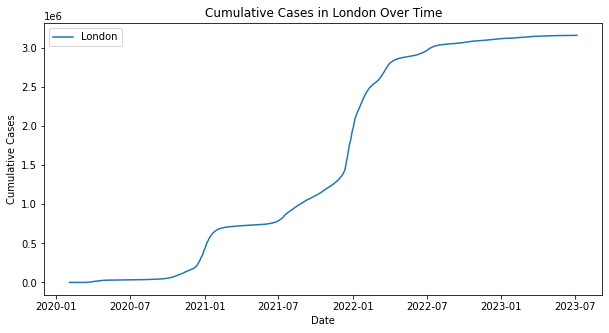

In [56]:
# solution

# 1: Aggregate and/or shape the data
london_cumulative_cases = covid_data[covid_data['area'] == 'London'][['date', 'cumulative_cases']]

# 2: Plot to Visualise
plt.figure(figsize=(10, 5))
plt.plot(london_cumulative_cases['date'], london_cumulative_cases['cumulative_cases'], label='London')
plt.title('Cumulative Cases in London Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Cases')
plt.legend()
plt.show()

# 3: Answer to the question
# The cumulative cases in London plateaued between Jan 2021 and July 2021 and similar trend was spotted between Jan 2022 to July 2022


Task 16

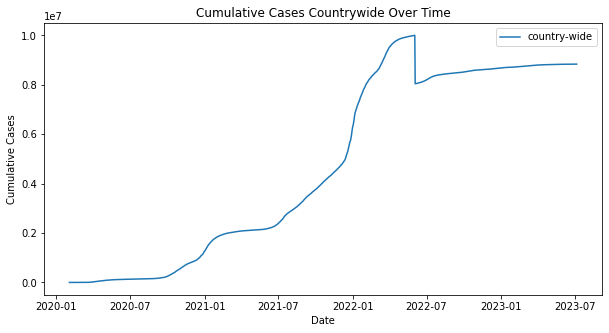

In [57]:
# solution

# 1: Aggregate and/or shape the data
area_cumulative_cases = covid_data.groupby('date')['cumulative_cases'].sum().reset_index()

# 2: Plot the data
plt.figure(figsize=(10, 5))
plt.plot(area_cumulative_cases['date'], area_cumulative_cases['cumulative_cases'], label='country-wide')
plt.title('Cumulative Cases Country-wide Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Cases')
plt.legend()
plt.show()

# 3: Answer
# As opposed to cumulative cases in London, there was a sharp decline in cumulative cases 
# countrywide in July 2022


Task 17

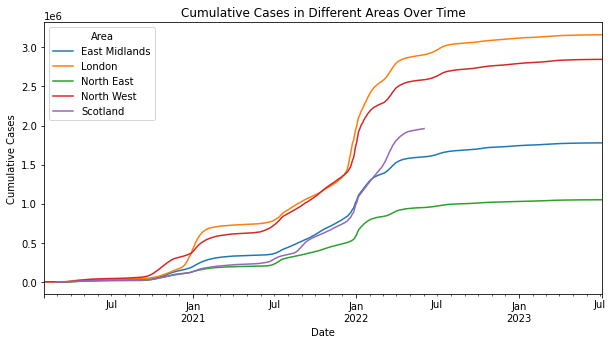

In [58]:
# solution

# 1: Aggregate and/or shape the data
regional_cumulative_cases = covid_data.pivot_table(index='date', columns='area', values='cumulative_cases', aggfunc='sum')

# 2: Plot the data
plt.figure(figsize=(10, 5))
regional_cumulative_cases.plot(ax=plt.gca())
plt.title('Cumulative Cases in Different Areas Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Cases')
plt.legend(title='Area')
plt.show()

# 3: Answer
# The plot illustrates the cumulative cases in different areas over time are following a similar trend , i.e. increasing cases
# for different regions/nations signified with different colours. This chart is helping us
# identify patterns and variations among different areas.

Task 18

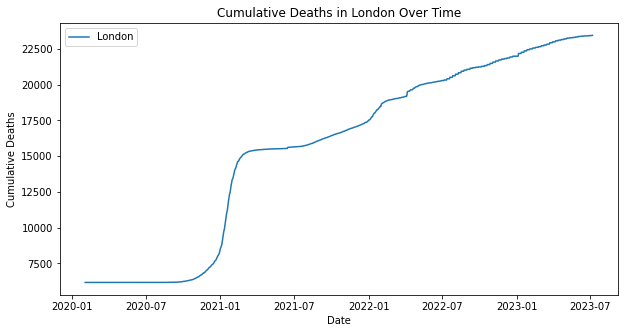

In [59]:
# solution

# 1: Aggregate and/or shape the data
london_cumulative_deaths = covid_data[(covid_data['area'] == 'London') & covid_data['cumulative_deaths'].notnull()]


# 2: Plot the data
plt.figure(figsize=(10, 5))
plt.plot(london_cumulative_deaths['date'], london_cumulative_deaths['cumulative_deaths'], label='London')
plt.title('Cumulative Deaths in London Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Deaths')
plt.legend()
plt.show()

# 3: Answer
#The ongoing trend is broken in Jan 2021 as there is a steep rise in cumulative deaths in London over time and 
#then the curve started plateauing thereafter.

Task 19

In [ ]:
# solution

# When we compare cumulative cases with cumulative deaths in London over time, there is a steep rise in deaths in 
# Jan 2021 but not in cases while the cases saw a sharp rise one year later, same month, i.e. Jan 2022. The deaths 
# in Jan 2022 did not see a sharp rise


Task 20

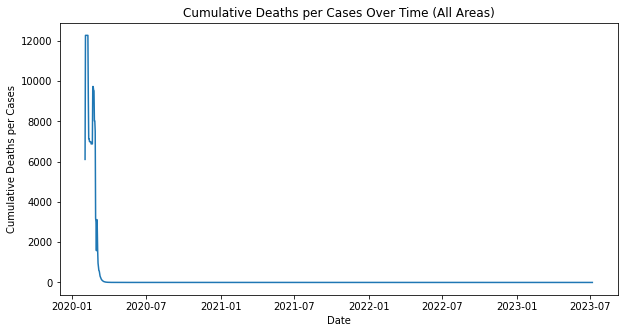

In [61]:
# solution

# 1: Aggregate and/or shape the data
covid_data['cumulative_deaths_per_cases'] = covid_data['cumulative_deaths'] / covid_data['cumulative_cases']
deaths_per_cases_overall = covid_data.groupby('date')['cumulative_deaths_per_cases'].sum().reset_index()


# 2: Plot the data
plt.figure(figsize=(10, 5))
plt.plot(deaths_per_cases_overall['date'], deaths_per_cases_overall['cumulative_deaths_per_cases'])
plt.title('Cumulative Deaths per Cases Over Time (All Areas)')
plt.xlabel('Date')
plt.ylabel('Cumulative Deaths per Cases')
plt.show()


# 3: Answer
# The plot illustrates the cumulative deaths per cases over time for all areas. In January 2020, there is 
# fluctuation in the ratio. Following this, there is a sharp decline in the same month thereafter, indicating a period 
# where the ratio decreases consistently, i.e. . The subsequent plateau suggests a stabilization in the cumulative deaths per cases. 
# Overall, the trend tends to decrease over time, indicating a positive trajectory in managing the impact of cases on 
# mortality rates. Further detailed analysis and contextual information could provide insights into the factors contributing to these trends.


Task 21

In [62]:
# solution 

# The steeper inclination in Jan 2020 imaplies effective healthcare services,  vaccination drives, 
# social distancing and self isolating. A sudden decrease in the cumulative deaths per cases may indicate a period where 
# lockdowns was implemented

Task 22

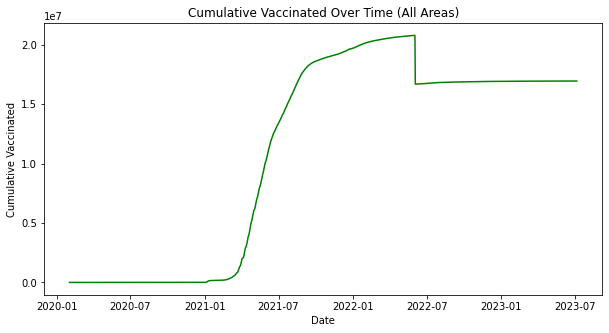

In [64]:
# solution 

# 1: Aggregate and/or shape the data
cumulative_vaccinated_overall = covid_data.groupby('date')['cumulative_vaccinated'].sum().reset_index()

# 2: Plot the data
plt.figure(figsize=(10, 5))
plt.plot(cumulative_vaccinated_overall['date'], cumulative_vaccinated_overall['cumulative_vaccinated'], color='green')
plt.title('Cumulative Vaccinated Over Time (All Areas)')
plt.xlabel('Date')
plt.ylabel('Cumulative Vaccinated')
plt.show()

# 3: Answer
# The plot shows that as the cumulative vaccinated trend over time increased, cumulative deaths per cases decreased.
# They are highly inversely correlated


Task 23

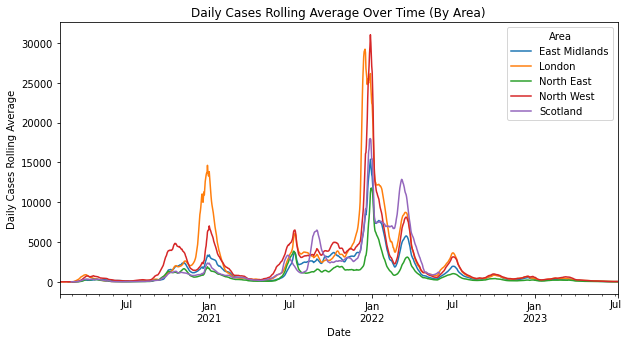

In [66]:
# solution 

# 1: Aggregate and/or shape the data
daily_cases_roll_avg_by_area = covid_data.pivot_table(index='date', columns='area', values='daily_cases_roll_avg')

# 2: Plot the data
plt.figure(figsize=(10, 5))
daily_cases_roll_avg_by_area.plot(ax=plt.gca())
plt.title('Daily Cases Rolling Average Over Time (By Area)')
plt.xlabel('Date')
plt.ylabel('Daily Cases Rolling Average')
plt.legend(title='Area')
plt.show()

# 3: Answer
# The majority of the cases are concentrated around the mean, creating a peak in the center of the curve.
# Its a normal distribution. Peak observed in January 2022 suggests a period of increased daily cases across
# all areas. Different areas are shown in different colours in the chart to focus on the individual patterns

Task 24

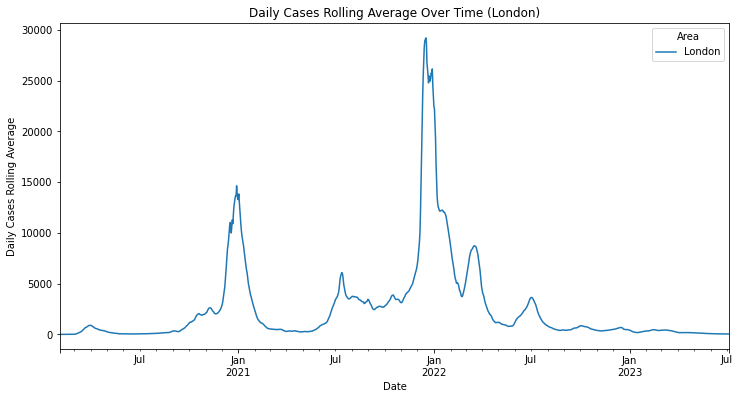

In [67]:
# solution 

# 1: Aggregate and/or shape the data
london_wales_daily_cases_roll_avg = covid_data[covid_data['area'].isin(['London'])]

# Data for Wales showed missing values even after filling cumulative columns with recent dates' vales, 
#thus it was being removed

# 2: Plot the data
plt.figure(figsize=(10, 5))
london_wales_daily_cases_roll_avg.pivot_table(index='date', columns='area', values='daily_cases_roll_avg').plot(ax=plt.gca())
plt.title('Daily Cases Rolling Average Over Time (London)')
plt.xlabel('Date')
plt.ylabel('Daily Cases Rolling Average')
plt.legend(title='Area')
plt.show()

# 3: Answer
#London's Daily cases rolling average peaked in Jan 2022 

Task 25

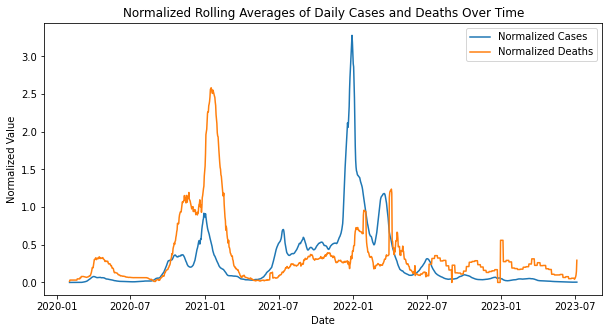

In [68]:
# solution 

# 1: Aggregate and/or shape the data

#Normalize daily cases and deaths rolling averages
covid_data['daily_cases_roll_avg_norm'] = covid_data['daily_cases_roll_avg'] / covid_data['daily_cases_roll_avg'].max()
covid_data['daily_deaths_roll_avg_norm'] = covid_data['daily_deaths_roll_avg'] / covid_data['daily_deaths_roll_avg'].max()

# 2: Plot the data
plt.figure(figsize=(10, 5))
plt.plot(covid_data.groupby('date')['daily_cases_roll_avg_norm'].sum(), label='Normalized Cases')
plt.plot(covid_data.groupby('date')['daily_deaths_roll_avg_norm'].sum(), label='Normalized Deaths')
plt.title('Normalized Rolling Averages of Daily Cases and Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.legend()
plt.show()

# 3: Answer
# In the chart, the peaks are different for normalised cases and normalised deaths.
# there is a delay or time gap between the two events. It implies that the rise in the number of 
# confirmed COVID-19 cases occurs earlier in time than the increase in daily deaths. We can say in general terms 
# that there is a delay in the onset of COVID-19 cases and the subsequent increase in mortality.